# Ratio Of Tested Vs Confirmed

In [41]:
# Enable Intellisense
%config IPCompleter.greedy=True

import pandas as pd
import numpy as np
import io
import requests
import seaborn as sns
from matplotlib import pyplot, dates
import plotly.express as px 
import datetime
import plotly.graph_objects as go
sns.set()

In [42]:
tests_data_url = "https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_timeline_testing.csv"
confirm_data_url = "https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_timeline_confirmed.csv"

tests_data_req = requests.get(tests_data_url).content
confirm_data_req = requests.get(confirm_data_url).content

tests_data = pd.read_csv(io.StringIO(tests_data_req.decode('utf-8')), delimiter = ',')
confirmed_data = pd.read_csv(io.StringIO(confirm_data_req.decode('utf-8')), delimiter = ',')

In [43]:
tests_data = pd.read_csv('tests_data.csv')

In [44]:
tests_data = tests_data[['date','cumulative_tests']]
confirmed_data = confirmed_data[['date']]

### tests_data

In [45]:
tests_data.tail()

,date,cumulative_tests
17,17-03-2020,2911
18,18-03-2020,3070
19,19-03-2020,4832
20,20-03-2020,6438
21,21-03-2020,7425


In [46]:
tests_data['date'] = pd.to_datetime(tests_data['date'], format='%d-%m-%Y')
tests_data.set_index('date', inplace = True)
tests_data

,cumulative_tests
date,
2020-02-11,61
2020-02-13,67
2020-02-14,71
2020-02-19,95
2020-02-20,106
2020-02-24,116
2020-02-26,121
2020-03-02,160
2020-03-03,164


### confirmed_data

In [47]:
confirmed_data.tail()

,date
235,21-03-2020
236,21-03-2020
237,21-03-2020
238,21-03-2020
239,21-03-2020


In [48]:
confirmed_data['date'] = pd.to_datetime(confirmed_data['date'], format='%d-%m-%Y')
confirmed_nos_data = pd.DataFrame(confirmed_data.groupby('date')['date'].count())
confirmed_nos_data.head()

,date
date,
2020-03-05,1
2020-03-07,1
2020-03-08,1
2020-03-09,4
2020-03-11,6


#### Confirmed Daily Cases

In [49]:
confirmed_nos_data.rename(columns={"date":"daily_cases"}, inplace = True)
confirmed_nos_data

,daily_cases
date,
2020-03-05,1
2020-03-07,1
2020-03-08,1
2020-03-09,4
2020-03-11,6
2020-03-12,3
2020-03-13,8
2020-03-14,14
2020-03-15,13


#### Cumulative Confirmed Cases and Tests Performed

In [50]:
confirmed_nos_data['cum_cases']=confirmed_nos_data['daily_cases'].cumsum()
confirmed_nos_data

,daily_cases,cum_cases
date,,
2020-03-05,1,1
2020-03-07,1,2
2020-03-08,1,3
2020-03-09,4,7
2020-03-11,6,13
2020-03-12,3,16
2020-03-13,8,24
2020-03-14,14,38
2020-03-15,13,51


## Tested Vs Confirmed

In [51]:
confirmed_nos_data

,daily_cases,cum_cases
date,,
2020-03-05,1,1
2020-03-07,1,2
2020-03-08,1,3
2020-03-09,4,7
2020-03-11,6,13
2020-03-12,3,16
2020-03-13,8,24
2020-03-14,14,38
2020-03-15,13,51


In [52]:
tests_confirmed_data = pd.concat([tests_data, confirmed_nos_data[['cum_cases']]], axis =1)
tests_confirmed_data

,cumulative_tests,cum_cases
date,,
2020-02-11,61.0,NaN
2020-02-13,67.0,NaN
2020-02-14,71.0,NaN
2020-02-19,95.0,NaN
2020-02-20,106.0,NaN
2020-02-24,116.0,NaN
2020-02-26,121.0,NaN
2020-03-02,160.0,NaN
2020-03-03,164.0,NaN


In [53]:
tests_confirmed_data.fillna(method='ffill', inplace=True)
tests_confirmed_data

,cumulative_tests,cum_cases
date,,
2020-02-11,61.0,NaN
2020-02-13,67.0,NaN
2020-02-14,71.0,NaN
2020-02-19,95.0,NaN
2020-02-20,106.0,NaN
2020-02-24,116.0,NaN
2020-02-26,121.0,NaN
2020-03-02,160.0,NaN
2020-03-03,164.0,NaN


In [54]:
tests_confirmed_data.dropna(inplace=True)
tests_confirmed_data

,cumulative_tests,cum_cases
date,,
2020-03-05,164.0,1.0
2020-03-06,200.0,1.0
2020-03-07,241.0,2.0
2020-03-08,241.0,3.0
2020-03-09,241.0,7.0
2020-03-11,645.0,13.0
2020-03-12,848.0,16.0
2020-03-13,924.0,24.0
2020-03-14,1017.0,38.0


In [55]:
tests_confirmed_data.to_csv("tests_vs_confirmed.csv")

## Visualisations
### Cumulative Cases Vs Cumulative Tests

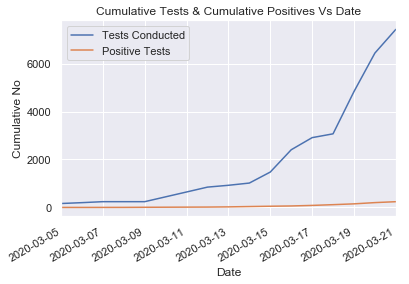

In [56]:
tests_confirmed_data['cumulative_tests'].plot()
p = tests_confirmed_data['cum_cases'].plot()
p.legend(loc='upper left', bbox_to_anchor=(0,1), labels=['Tests Conducted','Positive Tests'])
p.set_title('Cumulative Tests & Cumulative Positives Vs Date')
p.set_ylabel('Cumulative No')
p.set_xlabel('Date')
import matplotlib.pyplot as plt
plt.savefig("tests_vs_confirmed.png")

### Interactive Plot

In [57]:
df_wide = tests_confirmed_data.copy()
df_wide.reset_index(inplace=True)

In [61]:
df_long = pd.melt(df_wide, id_vars=['date'], value_vars=['cumulative_tests','cum_cases'])
fig = px.line(df_long, x='date', y='value', color='variable')

fig.update_layout(
    title="",
    xaxis_title="Date",
    yaxis_title="Cumulative No",
#     labels=["No of Cases","No of Postives"],
#     font=dict(
#         family="Courier New, monospace",
#         size=18,
#         color="#7f7f7f"
#     )
)

# Point markers
fig.add_trace(go.Scatter(x=df_wide['date'], y=df_wide['cumulative_tests'],mode='markers', hoverinfo='skip',
                        marker=dict(color='blue'), showlegend = False))

fig.add_trace(go.Scatter(x=df_wide['date'], y=df_wide['cum_cases'],mode='markers', hoverinfo='skip',
                        marker=dict(color='firebrick'), showlegend = False))

fig.data[0].name = "Daily Tests"
fig.data[1].name = "Daily Positive Cases"

fig.data[0].hovertemplate = '%{y}'
fig.data[1].hovertemplate = '%{y}'
fig.show(config = dict(displayModeBar=False))

#### Save plot to HTML

In [62]:
import plotly.io as pio
pio.write_html(fig, file='date_vs_cases_tests.html',config = dict(displayModeBar=False), auto_open=True)